In [1]:
import pandas as pd
import numpy as np

In [2]:
## forgot to add mths_since_last_record:>=86

In [3]:
# load the data

In [4]:
# we have to preserve the index incase we accidentally shuffle the target and the features

In [5]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv',index_col=0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv',index_col=0) 
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv',index_col=0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv',index_col=0) 

In [6]:
# index_col = makes sure the content of the first column of the csv will be used as index

## Explore the data

In [7]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,A5,...,1,0,0,1,0,0,0,0,0,0
206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,C1,...,0,0,0,1,0,0,0,0,0,0
136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,A5,...,0,0,0,1,0,0,0,0,0,0
412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,D1,...,0,0,0,1,0,0,0,0,0,0
36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,C2,...,0,1,0,1,0,0,0,0,0,0


In [8]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [9]:
loan_data_inputs_train.shape

(373028, 323)

In [10]:
loan_data_targets_train.shape

(373028, 1)

In [11]:
loan_data_inputs_test.shape

(93257, 323)

In [12]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the features

In [13]:
#

In [14]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Source Verified',
'verification_status:Not Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_date:<38',
'mths_since_issue_date:38-39',
'mths_since_issue_date:40-41',
'mths_since_issue_date:42-48',
'mths_since_issue_date:49-52',
'mths_since_issue_date:53-64',
'mths_since_issue_date:65-84',
'mths_since_issue_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.821',
'int_rate:>20.821',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:142-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K']]

In [15]:
# now we must remove one dummy for each original variable otherwise we will fall into the dummy variable trap

In [16]:
# while preprocessing we determined one reference category per variable 
# the reference will be the dummy to remove from the reference model
# whatever dummy not included in the training process will become benchmark/reference
# if all other dummies are 0 we will be in hte case where the remove dummy should have been 1
# from the df with all dummy variable we must remove the reference. category 

In [17]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_date:>84',
'int_rate:>20.821',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'annual_inc:<20K',
'mths_since_last_delinq:0-3',
'dti:>35',
'mths_since_last_record:0-2',
'total_rev_hi_lim:<=5K']

In [18]:
# now selecting only the releveant dummies for our PD model,, they are all dummies less the reference category

In [19]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories,axis=1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K
427211,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
206088,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
136020,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
# inputs_train.corr()==1

In [21]:
inputs_train.shape

(373028, 98)

## PD model Estimation

### Logistic Regression

In [22]:
# here we employ sk-learn for model estimation

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [24]:
reg = LogisticRegression()

In [25]:
pd.options.display.max_rows = None

In [26]:
# this command alone will estimate our PD model

In [27]:
reg.fit(inputs_train,loan_data_targets_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
reg.coef_

array([[ 1.23196248,  0.95047756,  0.74136036,  0.53901092,  0.35019068,
         0.15341443,  0.11412067,  0.09857561, -0.03347856, -0.0163884 ,
         0.00453919,  0.06275445,  0.02709815,  0.10912444,  0.17611452,
         0.19117607,  0.24561841,  0.44868788, -0.00575611,  0.09864092,
         0.01221475,  0.06166334,  0.05367581,  0.06917175,  0.02154435,
         0.        ,  0.        ,  0.        ,  0.04689489,  1.10960399,
         0.90775773,  0.80963839,  0.60883072,  0.44676566,  0.1995247 ,
        -0.04822126,  0.82919795,  0.53917656,  0.29178975,  0.10615589,
         0.04613419,  0.02560216,  0.065883  ,  0.10637524,  0.10421712,
         0.05190822,  0.02425951,  0.63700084,  0.49356867,  0.28180079,
         0.0282433 , -0.0597609 , -0.08275911, -0.09665496, -0.10149848,
        -0.07919521, -0.16541125,  0.12426124,  0.15542158, -0.02100188,
         0.03350668,  0.27752102, -0.03529269,  0.03757747,  0.13921569,
         0.20959222,  0.28720225,  0.36209817,  0.4

In [29]:
reg.intercept_

array([-0.90550146])

In [30]:
# now we have apply the proper formatting

In [31]:
feature_name = inputs_train.columns.values

In [32]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0]=['Intercept',reg.intercept_[0]]
summary_table= summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.905501
1,grade:A,1.231962
2,grade:B,0.950478
3,grade:C,0.741360
4,grade:D,0.539011
5,grade:E,0.350191
6,grade:F,0.153414
7,home_ownership:MORTGAGE,0.114121
8,home_ownership:OWN,0.098576
9,addr_state:NM_VA,-0.033479


## Build a Logistic Regression model with P-values

In [33]:
# we need to assess which independent variable contribute to predicting borrower default
# in our final model we are going to keep only those which actually contribute in explaining the good_bad dependent var

# for most statistical method the most accepted approach is to check statistical sig of the coeff of each dummy var

# one of the most common way to achieve that is to look at the p-value 

# the Logisticregression module does not have a built-in way to calculate the multivariate p-value

# one of the cleanest way is to alter .fit() from the LogisticRegression Class 

In [34]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    # we inherit everything for original logistic regression class
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
    # we define a fit function which overwrites original .fit()  with a function that calculates multivariate p-values too 
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        F_ij = F_ij+0.00001*np.random.rand(F_ij.shape[0],F_ij.shape[1])
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores]
        self.coef_= self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [35]:
reg = LogisticRegression_with_p_values()

In [36]:
reg.fit(inputs_train,loan_data_targets_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-34-752800616c5b>:16: RuntimeWarning: invalid value encountered in sqrt
  sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))


In [37]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0]=['Intercept',reg.intercept_[0]]
summary_table= summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.905501
1,grade:A,1.231962
2,grade:B,0.950478
3,grade:C,0.741360
4,grade:D,0.539011
5,grade:E,0.350191
6,grade:F,0.153414
7,home_ownership:MORTGAGE,0.114121
8,home_ownership:OWN,0.098576
9,addr_state:NM_VA,-0.033479


In [38]:
p_values = reg.p_values

In [39]:
p_values = np.append(np.nan, np.array(p_values))

In [40]:
summary_table['p_values'] = p_values

In [41]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.905501,NaN
1,grade:A,1.231962,1.223218e-42
2,grade:B,0.950478,6.121894e-55
3,grade:C,0.741360,2.488778e-39
4,grade:D,0.539011,1.034190e-23
5,grade:E,0.350191,3.119483e-13
6,grade:F,0.153414,2.205230e-03
7,home_ownership:MORTGAGE,0.114121,6.675365e-20
8,home_ownership:OWN,0.098576,9.313273e-07
9,addr_state:NM_VA,-0.033479,2.475565e-01


In [42]:
# each original independent variable is represented by several dummy variables
#if the coeff for all of these dummy variables are statistically sig, we should retain all of them , and if the coeff
# of none of the dummy variables are statistically sig , we should remove all of them
# if one or few dummy variables representing one original independent varibale are statistiaclly sig , it would be best
# to retain all of the dummy variable that represent that original independent variable 

# conventionally, if the p-value is lower than 0.05, we conclude that the coeff of the variable is statistically sig


In [43]:
# the coeff for all dummy variables that represent the grade variable are statistically significant thus we keep thse
# dummy variable
# the coeff for all dummy var that represet the home_ownership vairable are statistically sig, so week them as well

# for addr_ all bu first are statisticallys sig thus we keep all of them
# for verification_status, only one is stat sig but that is enough to preserve both the var for the final model

# keep all upto deliq_lat_2 moth-- both are stat insig. 
#  for open account -- keep all of them since one is sig
# remove public record and total accc- remove them altogether
# keep acc now deliquent 

In [44]:
# for the final model:
# we remove : delinq_2yrs, open_acc, pub_rec, total_rev_hi_lim, total_acc
# we keep all the rest


In [45]:
# overwrite and take only the dummy variable which we found to be sig. 

In [46]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Source Verified',
'verification_status:Not Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_date:<38',
'mths_since_issue_date:38-39',
'mths_since_issue_date:40-41',
'mths_since_issue_date:42-48',
'mths_since_issue_date:49-52',
'mths_since_issue_date:53-64',
'mths_since_issue_date:65-84',
'mths_since_issue_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.821',
'int_rate:>20.821',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:142-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86'
]]

In [47]:
# we only take ref categories of the dummmy variable we found significant

In [48]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_date:>84',
'int_rate:>20.821',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'mths_since_last_delinq:0-3',
'dti:>35',
'mths_since_last_record:0-2',
]

In [49]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories,axis=1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
427211,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
206088,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
136020,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
36159,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [50]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train,loan_data_targets_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-34-752800616c5b>:16: RuntimeWarning: invalid value encountered in sqrt
  sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))


In [51]:
feature_name = inputs_train.columns.values

In [52]:
summary_table = pd.DataFrame(columns=['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0]=['Intercept',reg2.intercept_[0]]
summary_table= summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.987174
1,grade:A,1.178105
2,grade:B,0.935291
3,grade:C,0.729899
4,grade:D,0.530124
5,grade:E,0.343686
6,grade:F,0.147508
7,home_ownership:MORTGAGE,0.113176
8,home_ownership:OWN,0.099589
9,addr_state:NM_VA,-0.036045


In [53]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values 
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.987174,NaN
1,grade:A,1.178105,7.173741e-39
2,grade:B,0.935291,8.058638e-54
3,grade:C,0.729899,9.126965e-39
4,grade:D,0.530124,1.695565e-23
5,grade:E,0.343686,2.379157e-13
6,grade:F,0.147508,2.502896e-03
7,home_ownership:MORTGAGE,0.113176,9.309991e-20
8,home_ownership:OWN,0.099589,6.856868e-07
9,addr_state:NM_VA,-0.036045,2.124421e-01


In [54]:
# we now have the final PDmodel, after we have selected only the highy statistically set of dummy variables the final model
# contains 78 ind dummy var

### Interpreting the coefficients in the PD mdoel

### PD model Validation (Test)


#### Out of sample validation (test)

In [55]:
# we split the data into train and test dataset
# we use the train dataset to trian(estimate) the model
# now we use test dataset to test the model

In [56]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Source Verified',
'verification_status:Not Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_date:<38',
'mths_since_issue_date:38-39',
'mths_since_issue_date:40-41',
'mths_since_issue_date:42-48',
'mths_since_issue_date:49-52',
'mths_since_issue_date:53-64',
'mths_since_issue_date:65-84',
'mths_since_issue_date:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.821',
'int_rate:>20.821',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:142-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86']]

In [57]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_date:>84',
'int_rate:>20.821',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'mths_since_last_delinq:0-3',
'dti:>35',
'mths_since_last_record:0-2'
]

In [58]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories,axis=1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,...,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
288564,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
213591,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
263083,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
165001,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
# now we will estimate the prob of default of each observation from the test data

In [60]:
y_hat_test = reg2.model.predict(inputs_test)

In [61]:
# first, multiplies the values of variales by the model coeff , this yields the log of odds being good
# an exponent raised to the power the log of odds, this yields the odd of being good and the estimated prob of being good
# the estimated probabilities are categoriezed into being good or bad by applying a cut-off

# the deafult cut-off is 0.5 or 50% -- estimated prob <=50% : bad 0
# estimated prob if > 50% good 1

In [62]:
y_hat_test  # array of 0 and 1

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
# there are other possible cut-offs , for instance 0.3 
# we may select any value between 0 and 1 to be the cut -off

# therfore it is much more imp to obtian the raw Prob predictions

In [64]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test) 

In [65]:
y_hat_test_proba # each of these array is composed of 2 elements, the first col is the probability of deafult and the
# second element is the porb of being non-default/good-borrower (1-PD)

# there is 1-to-1 correspondence between these 2 probabilities 

array([[0.06907873, 0.93092127],
       [0.17065906, 0.82934094],
       [0.11419496, 0.88580504],
       ...,
       [0.02720342, 0.97279658],
       [0.03872702, 0.96127298],
       [0.04777927, 0.95222073]])

In [66]:
# to obtain prob of being a good borrwoer

y_hat_test_proba[:][:,1]

array([0.93092127, 0.82934094, 0.88580504, ..., 0.97279658, 0.96127298,
       0.95222073])

In [67]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [68]:
loan_data_targets_test_temp = loan_data_targets_test

In [69]:
loan_data_targets_test_temp.reset_index(drop=True, inplace=True)

In [70]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)], axis=1)

In [71]:
df_actual_predicted_probs.shape

(93257, 2)

In [72]:
df_actual_predicted_probs.columns = ['loan_data_targets_test','y_hat_test_proba']

In [73]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [74]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.930921
288564,1,0.829341
213591,1,0.885805
263083,1,0.940201
165001,1,0.969149


In [75]:
# estimated_prob<=cut-off prob -- bad (default)
# estimated_prob>cut_off prob  -- good (non-default)

### Accuracy and Area under the curve

In [76]:
tr = 0.5
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0) 

In [77]:
# let us create a confusion matrix

In [78]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,3,10187
1,6,83061


In [79]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000032,0.109236
1,0.000064,0.890668


In [80]:
# adding TP AND TN would give the accuracy

In [81]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[0,0]+(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1,1]

0.8906998938417492

In [82]:
# out of all actual good observations, 83061 are predicted to be good and only 6 are predicted to be bad
# out of all actual bad observations, obly 3 observations are predicted to be bad while more than 10000 are predicted
# to be good 
# this seems like a problem

In [83]:
# under a threshold of 0.5 a model generates lot of false positive,, observation that re bad are being classified
# as beign good 
# imagine what would happen if the model was used for maing a decision such as granting loan with this threshold 
# a lot of bad applicants would be given loans ,, this is completely unaccpetable

In [84]:
# that' what happen if we keep the default threshold
# since very few people deaults on hteir loan the regression learns that and classifies almost all cases as good 

# to solve this we set more conservative threshold -- say 0.9

In [85]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0) 

In [86]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,7356,2834
1,35881,47186


In [87]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078879,0.030389
1,0.384754,0.505978


In [88]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[0,0]+(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
            rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_probs.shape[0]).iloc[1,1]

0.5848569008224584

In [89]:
# now the overall accracy seems to be more lower  -- around 59 percent
# but the number of true negaitve has increased to 7356 but true positive has increased 

In [90]:
# if the lender uses this model, they owuld redure the number of deafults , but also the number of overall approved loans
# thus 0.9 is too conservative and may lead to loosing business

In [91]:
## while doing credit modeling we want to minimize the risk but still give out loans-- that how we make money

In [92]:
# thus overall accuracy is not the universal measure for the PD model

In [93]:
from sklearn.metrics import roc_curve,roc_auc_score

In [94]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99980373, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 3.49115774e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.99213344, 0.99213344, 0.98984025, ..., 0.43196747, 0.41001209,
        0.3961932 ]))

In [95]:
# this returns array of FP RATE, TP RATE, AND THE THRESHOLDS
# for each threshold we know the false postive and the true positve rate

In [96]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [97]:
# roc curve shows tpr as the fucntion of fpr

# receiver operating charateristic curve

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

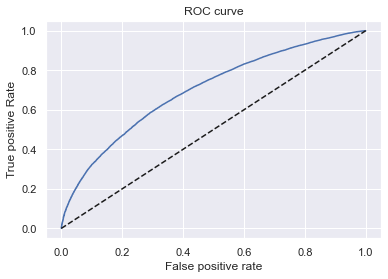

In [99]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k') # benchmark for comparision (predicting by chance)
plt.xlabel('False positive rate')
plt.ylabel('True positive Rate')
plt.title('ROC curve')

In [100]:
# since the blue line which we plotted is the curve for our model. since it is above the 45 degree line for any threshold
# the true positive reate is better than the one predicted by chance 


# by how much better

# the area under the ROC is called Area under the curve (AUC),, it is the good overall measure of how good the classification
# model is
# the auc for predicting by chance is 50% 

In [101]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6999831106930212

### Gini and Kolmogorov-Smirnov

In [102]:
# we need to order the dataframe that contains the target adnd the probabiities by the estimated prob in an ascending
# order

In [103]:
df_actual_predicted_probs=df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [104]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.396193,0
39810,0,0.410012,0
40518,0,0.427252,0
41742,1,0.431967,0
42344,1,0.479136,0


In [105]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
261086,1,0.991459,1
262480,1,0.991609,1
239228,1,0.991734,1
251900,1,0.992069,1
242624,1,0.992133,1


In [106]:
# we have sorted it by the predicted prob in ascending order
# in order to calculate the cumulative proportions we need to reindex the dataframe as it is sorted now
# we need the row with lowest y_hat_test_proba have index of 0 -- using reset_index()

In [107]:
df_actual_predicted_probs =df_actual_predicted_probs.reset_index()
# creates a new index and saves old one in a new columns

In [108]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.396193,0
1,39810,0,0.410012,0
2,40518,0,0.427252,0
3,41742,1,0.431967,0
4,42344,1,0.479136,0


In [109]:
df_actual_predicted_probs.columns

Index(['index', 'loan_data_targets_test', 'y_hat_test_proba', 'y_hat_test'], dtype='object')

In [110]:
# df_actual_predicted_probs.drop('level_0',axis=1,inplace=True)

KeyError: "['level_0'] not found in axis"

In [111]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.396193,0
1,39810,0,0.410012,0
2,40518,0,0.427252,0
3,41742,1,0.431967,0
4,42344,1,0.479136,0


In [112]:
# to make plots of our model performance critera we need:
# 1. the cumulative % of total populaiton
# 2. the cumulative % of good borrowers
# 3. the cumulative % of bad borrowers

In [113]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index+1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population']- df_actual_predicted_probs['loan_data_targets_test'].cumsum()


In [114]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.396193,0,1,1,0
1,39810,0,0.410012,0,2,1,1
2,40518,0,0.427252,0,3,1,2
3,41742,1,0.431967,0,4,2,2
4,42344,1,0.479136,0,5,3,2


In [115]:
# cumulative proportion are the numbers didved by their own total

In [116]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population']/(df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good']/(df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad']/(df_actual_predicted_probs.shape[0]-df_actual_predicted_probs['loan_data_targets_test'].sum())

In [117]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.396193,0,1,1,0,0.000011,0.000012,0.000000
1,39810,0,0.410012,0,2,1,1,0.000021,0.000012,0.000098
2,40518,0,0.427252,0,3,1,2,0.000032,0.000012,0.000196
3,41742,1,0.431967,0,4,2,2,0.000043,0.000024,0.000196
4,42344,1,0.479136,0,5,3,2,0.000054,0.000036,0.000196


In [118]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,261086,1,0.991459,1,93253,83063,10190,0.999957,0.999952,1.0
93253,262480,1,0.991609,1,93254,83064,10190,0.999968,0.999964,1.0
93254,239228,1,0.991734,1,93255,83065,10190,0.999979,0.999976,1.0
93255,251900,1,0.992069,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.992133,1,93257,83067,10190,1.000000,1.000000,1.0


In [119]:
# for Gini:

# it is the function of cumulative perc of bad borrowers as a function of cumulative percentage of all borrowers

Text(0.5, 1.0, 'Gini')

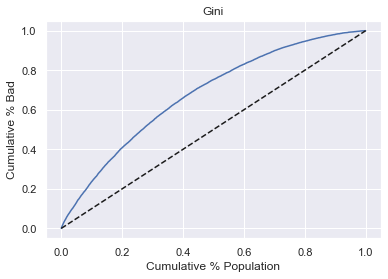

In [120]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], 
        linestyle='--',color='k')

plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')


In [121]:
# gini = auric *2 - 1

In [122]:
Gini = AUROC*2-1
Gini # gini coeff

0.39996622138604243

In [123]:
# for k-s, measure the distances betn two cumulative distribution fucntions,, the further apart they are the better the
# underlying features differentialtes them

# here we are intersted in the diff betwn the cumulative distribution functions of actual good borrowe and actual bad
# borrower plotted by estimated probability of being a good borrower 

# perfect model -> maximum distace --> k-s =1 (ks statistics would be 1)
# predicting by chance --> almost no distance ---> k-s=0

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

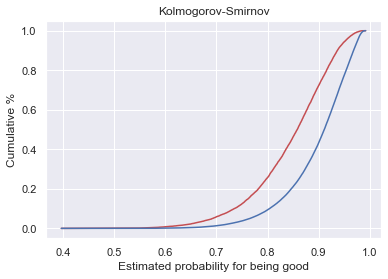

In [124]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated probability for being good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')



In [125]:
# the k-s criterion is the maximum difference between the red and blue curve 

In [126]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad']-df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2934591114142901

In [127]:
# though not close to 1, it is significanlyt grater than 0 
# the two cumulaitve distribution funcitons are sufficienlty far away from each other and the model has satisfactory
# predictive power

### Applying the PD model

#### calculating the PD of individual accounts

In [128]:
pd.options.display.max_columns = None

In [129]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Source Verified,verification_status:Not Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,mths_since_issue_date:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.821,int_rate:>20.821,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:142-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [130]:
# looking at the first observations wiht index: 362514

In [131]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.987174,NaN
1,grade:A,1.178105,7.173741e-39
2,grade:B,0.935291,8.058638e-54
3,grade:C,0.729899,9.126965e-39
4,grade:D,0.530124,1.695565e-23
5,grade:E,0.343686,2.379157e-13
6,grade:F,0.147508,2.502896e-03
7,home_ownership:MORTGAGE,0.113176,9.309991e-20
8,home_ownership:OWN,0.099589,6.856868e-07
9,addr_state:NM_VA,-0.036045,2.124421e-01


#### Creating a scorecard

In [132]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.987174,NaN
1,grade:A,1.178105,7.173741e-39
2,grade:B,0.935291,8.058638e-54
3,grade:C,0.729899,9.126965e-39
4,grade:D,0.530124,1.695565e-23
5,grade:E,0.343686,2.379157e-13
6,grade:F,0.147508,2.502896e-03
7,home_ownership:MORTGAGE,0.113176,9.309991e-20
8,home_ownership:OWN,0.099589,6.856868e-07
9,addr_state:NM_VA,-0.036045,2.124421e-01


In [133]:
# we were not allowed to include reference category when estimaitng the model,, however when predicting Prob of default
# we just take those as 0.

# but while creating a scorecard we want to be as interpretable as possible thus less include these reference category
# and include them in the scorecard

In [134]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_date:>84',
 'int_rate:>20.821',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'mths_since_last_delinq:0-3',
 'dti:>35',
 'mths_since_last_record:0-2']

In [135]:
df_ref_categories = pd.DataFrame(ref_categories, columns=['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_date:>84,0,NaN
9,int_rate:>20.821,0,NaN


In [136]:
# this dataframe has exact same layout as summary table dataframe

In [137]:
df_scorecard = pd.concat([summary_table,df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard


,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.987174,NaN
1,1,grade:A,1.178105,7.173741e-39
2,2,grade:B,0.935291,8.058638e-54
3,3,grade:C,0.729899,9.126965e-39
4,4,grade:D,0.530124,1.695565e-23
5,5,grade:E,0.343686,2.379157e-13
6,6,grade:F,0.147508,2.502896e-03
7,7,home_ownership:MORTGAGE,0.113176,9.309991e-20
8,8,home_ownership:OWN,0.099589,6.856868e-07
9,9,addr_state:NM_VA,-0.036045,2.124421e-01


In [138]:
# this way we get the output from our PD model as if we have includede the refrenece categories in the model estimation
# and had coeff of 0 

In [139]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.987174,NaN,Intercept
1,1,grade:A,1.178105,7.173741e-39,grade
2,2,grade:B,0.935291,8.058638e-54,grade
3,3,grade:C,0.729899,9.126965e-39,grade
4,4,grade:D,0.530124,1.695565e-23,grade
5,5,grade:E,0.343686,2.379157e-13,grade
6,6,grade:F,0.147508,2.502896e-03,grade
7,7,home_ownership:MORTGAGE,0.113176,9.309991e-20,home_ownership
8,8,home_ownership:OWN,0.099589,6.856868e-07,home_ownership
9,9,addr_state:NM_VA,-0.036045,2.124421e-01,addr_state


In [140]:
# in order to create a scorecard we need to turn the regression coeff. from our PD model into simple scores 

In [141]:
# first we decide the minimum and the maximum score:
# let minimum score = 300, maximum score = 850 just like the most typical FICO score

In [142]:
min_score= 300
max_score = 850

In [143]:
# we must rescale the credit worthiness assessment prodeucde by our model to the desired credit score

# thus we also need minumun and maxumum of the credit worthiness asssessment that can be obtained from the PD model

In [144]:
# the minimum credit assessment is reached when a borrower falls into the worst categories of all variables 
# the maxmum credit assesment is reached when a borrower falls into the best categories for all vairbles

In [145]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -0.987174
acc_now_delinq                 0.000000
addr_state                    -0.036045
annual_inc                    -0.059397
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_date         -0.062020
mths_since_last_delinq         0.000000
mths_since_last_record        -0.044820
purpose                        0.000000
term                           0.000000
verification_status           -0.004848
Name: Coefficients, dtype: float64

In [146]:
# we got the minimum per each original independent variable 
# intercept has only 1 value and we got that
# most minimum values are 0

In [147]:
min_sum_coeff = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coeff

-1.1943030751703403

In [148]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -0.987174
acc_now_delinq                 0.239656
addr_state                     0.453331
annual_inc                     0.603502
dti                            0.367522
emp_length                     0.048635
grade                          1.178105
home_ownership                 0.113176
initial_list_status            0.055880
inq_last_6mths                 0.710241
int_rate                       0.880711
mths_since_earliest_cr_line    0.114145
mths_since_issue_date          1.100860
mths_since_last_delinq         0.243728
mths_since_last_record         0.285153
purpose                        0.059488
term                           0.067320
verification_status            0.097719
Name: Coefficients, dtype: float64

In [149]:
max_sum_coeff = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coeff


5.631999342448536

In [150]:
# now we need to rescale the coeff to scores

In [151]:
df_scorecard['Score-Calculation'] = df_scorecard['Coefficients']*(max_score-min_score)/(max_sum_coeff-min_sum_coeff)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation
0,0,Intercept,-0.987174,NaN,Intercept,-79.537339
1,1,grade:A,1.178105,7.173741e-39,grade,94.920752
2,2,grade:B,0.935291,8.058638e-54,grade,75.357061
3,3,grade:C,0.729899,9.126965e-39,grade,58.808475
4,4,grade:D,0.530124,1.695565e-23,grade,42.712453
5,5,grade:E,0.343686,2.379157e-13,grade,27.691018
6,6,grade:F,0.147508,2.502896e-03,grade,11.884832
7,7,home_ownership:MORTGAGE,0.113176,9.309991e-20,home_ownership,9.118682
8,8,home_ownership:OWN,0.099589,6.856868e-07,home_ownership,8.023961
9,9,addr_state:NM_VA,-0.036045,2.124421e-01,addr_state,-2.904153


In [152]:
# the score corresponding to the intercept is very close to the minimum score in the worst case scenario -- i.e 300

In [153]:
df_scorecard['Score-Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coeff)/(max_sum_coeff-min_sum_coeff))*(max_score-min_score)+min_score
df_scorecard

<ipython-input-153-cb3a662af3cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score-Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coeff)/(max_sum_coeff-min_sum_coeff))*(max_score-min_score)+min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation
0,0,Intercept,-0.987174,NaN,Intercept,316.688502
1,1,grade:A,1.178105,7.173741e-39,grade,94.920752
2,2,grade:B,0.935291,8.058638e-54,grade,75.357061
3,3,grade:C,0.729899,9.126965e-39,grade,58.808475
4,4,grade:D,0.530124,1.695565e-23,grade,42.712453
5,5,grade:E,0.343686,2.379157e-13,grade,27.691018
6,6,grade:F,0.147508,2.502896e-03,grade,11.884832
7,7,home_ownership:MORTGAGE,0.113176,9.309991e-20,home_ownership,9.118682
8,8,home_ownership:OWN,0.099589,6.856868e-07,home_ownership,8.023961
9,9,addr_state:NM_VA,-0.036045,2.124421e-01,addr_state,-2.904153


In [154]:
# finally to make it more interpretable and uer-friendly just round the score calculaiton

In [155]:
df_scorecard['Score-Preliminary'] = df_scorecard['Score-Calculation'].round()

In [156]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation,Score-Preliminary
0,0,Intercept,-0.987174,NaN,Intercept,316.688502,317.0
1,1,grade:A,1.178105,7.173741e-39,grade,94.920752,95.0
2,2,grade:B,0.935291,8.058638e-54,grade,75.357061,75.0
3,3,grade:C,0.729899,9.126965e-39,grade,58.808475,59.0
4,4,grade:D,0.530124,1.695565e-23,grade,42.712453,43.0
5,5,grade:E,0.343686,2.379157e-13,grade,27.691018,28.0
6,6,grade:F,0.147508,2.502896e-03,grade,11.884832,12.0
7,7,home_ownership:MORTGAGE,0.113176,9.309991e-20,home_ownership,9.118682,9.0
8,8,home_ownership:OWN,0.099589,6.856868e-07,home_ownership,8.023961,8.0
9,9,addr_state:NM_VA,-0.036045,2.124421e-01,addr_state,-2.904153,-3.0


In [157]:
# now lets check if the mimimul possible score and maximum possible score are equal to the desired minimum and maximum
# scores (300-850)

In [158]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score-Preliminary'].min().sum()
min_sum_score_prel

300.0

In [159]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score-Preliminary'].max().sum()
max_sum_score_prel

852.0

In [160]:
# 2 grater than the desied maximum,, this diff is due to the rounding we did 
# we can fix this by subracting 2
# it would be best to subtract it from the variable that was rounded the most

In [161]:
df_scorecard['Difference'] = df_scorecard['Score-Preliminary']-df_scorecard['Score-Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation,Score-Preliminary,Difference
0,0,Intercept,-0.987174,NaN,Intercept,316.688502,317.0,0.311498
1,1,grade:A,1.178105,7.173741e-39,grade,94.920752,95.0,0.079248
2,2,grade:B,0.935291,8.058638e-54,grade,75.357061,75.0,-0.357061
3,3,grade:C,0.729899,9.126965e-39,grade,58.808475,59.0,0.191525
4,4,grade:D,0.530124,1.695565e-23,grade,42.712453,43.0,0.287547
5,5,grade:E,0.343686,2.379157e-13,grade,27.691018,28.0,0.308982
6,6,grade:F,0.147508,2.502896e-03,grade,11.884832,12.0,0.115168
7,7,home_ownership:MORTGAGE,0.113176,9.309991e-20,home_ownership,9.118682,9.0,-0.118682
8,8,home_ownership:OWN,0.099589,6.856868e-07,home_ownership,8.023961,8.0,-0.023961
9,9,addr_state:NM_VA,-0.036045,2.124421e-01,addr_state,-2.904153,-3.0,-0.095847


In [162]:
# the gratest rounding where diff is gratetst 
df_scorecard['Difference'].argmax()

23

In [163]:
df_scorecard.iloc[abs(df_scorecard['Difference']).argmax(),:]

index                                       23
Feature name             initial_list_status:w
Coefficients                         0.0558799
p_values                           1.84217e-05
Original feature name      initial_list_status
Score-Calculation                      4.50229
Score-Preliminary                            5
Difference                            0.497715
Name: 23, dtype: object

In [164]:
# second highest is at index 32,, let us subtract 1 from each

In [165]:
df_scorecard['Score-Final'] = df_scorecard['Score-Preliminary']
df_scorecard['Score-Final'][23] = 4
df_scorecard['Score-Final'][32] = 64
df_scorecard['Score-Final'][18] = 36

df_scorecard

<ipython-input-165-4f066bc9a220>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score-Final'][23] = 4
<ipython-input-165-4f066bc9a220>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score-Final'][32] = 64
<ipython-input-165-4f066bc9a220>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score-Final'][18] = 36


,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation,Score-Preliminary,Difference,Score-Final
0,0,Intercept,-0.987174,NaN,Intercept,316.688502,317.0,0.311498,317.0
1,1,grade:A,1.178105,7.173741e-39,grade,94.920752,95.0,0.079248,95.0
2,2,grade:B,0.935291,8.058638e-54,grade,75.357061,75.0,-0.357061,75.0
3,3,grade:C,0.729899,9.126965e-39,grade,58.808475,59.0,0.191525,59.0
4,4,grade:D,0.530124,1.695565e-23,grade,42.712453,43.0,0.287547,43.0
5,5,grade:E,0.343686,2.379157e-13,grade,27.691018,28.0,0.308982,28.0
6,6,grade:F,0.147508,2.502896e-03,grade,11.884832,12.0,0.115168,12.0
7,7,home_ownership:MORTGAGE,0.113176,9.309991e-20,home_ownership,9.118682,9.0,-0.118682,9.0
8,8,home_ownership:OWN,0.099589,6.856868e-07,home_ownership,8.023961,8.0,-0.023961,8.0
9,9,addr_state:NM_VA,-0.036045,2.124421e-01,addr_state,-2.904153,-3.0,-0.095847,-3.0


In [166]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score-Final'].max().sum()
max_sum_score_prel

850.0

In [167]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score-Final'].min().sum()
min_sum_score_prel

300.0

In [168]:
# score-final column contains the score for final category

#### Calculating the Credit score

In [169]:
# to calculate the credit score of a borrower we only have to sum the credit score corresponding to the respective dummy
# variables categories

In [170]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Source Verified,verification_status:Not Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,mths_since_issue_date:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.821,int_rate:>20.821,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:142-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [171]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score-Calculation,Score-Preliminary,Difference,Score-Final
0,0,Intercept,-0.987174,NaN,Intercept,316.688502,317.0,0.311498,317.0
1,1,grade:A,1.178105,7.173741e-39,grade,94.920752,95.0,0.079248,95.0
2,2,grade:B,0.935291,8.058638e-54,grade,75.357061,75.0,-0.357061,75.0
3,3,grade:C,0.729899,9.126965e-39,grade,58.808475,59.0,0.191525,59.0
4,4,grade:D,0.530124,1.695565e-23,grade,42.712453,43.0,0.287547,43.0
5,5,grade:E,0.343686,2.379157e-13,grade,27.691018,28.0,0.308982,28.0
6,6,grade:F,0.147508,2.502896e-03,grade,11.884832,12.0,0.115168,12.0
7,7,home_ownership:MORTGAGE,0.113176,9.309991e-20,home_ownership,9.118682,9.0,-0.118682,9.0
8,8,home_ownership:OWN,0.099589,6.856868e-07,home_ownership,8.023961,8.0,-0.023961,8.0
9,9,addr_state:NM_VA,-0.036045,2.124421e-01,addr_state,-2.904153,-3.0,-0.095847,-3.0


In [172]:
# we calculate the credit score by multiplying the values of dummy variables, which are only 0 and 1s by the respective
# score in the score-final column of te df_scorecard dataframe

In [173]:
inputs_test_with_ref_cat_w_intercept= inputs_test_with_ref_cat

In [174]:
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept',1)
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Source Verified,verification_status:Not Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,mths_since_issue_date:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.821,int_rate:>20.821,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:142-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
362514,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [175]:
# now we still need to make sure that the columns are arranged in the same order for multiplicaiton

In [176]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [177]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Source Verified,verification_status:Not Verified,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.821,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:142-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_date:>84,int_rate:>20.821,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,mths_since_last_delinq:0-3,dti:>35,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
213591,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [178]:
scorecard_scores = df_scorecard['Score-Final']
scorecard_scores

0     317.0
1      95.0
2      75.0
3      59.0
4      43.0
5      28.0
6      12.0
7       9.0
8       8.0
9      -3.0
10     -1.0
11      0.0
12      5.0
13      2.0
14      9.0
15     14.0
16     16.0
17     20.0
18     36.0
19     -0.0
20      8.0
21      1.0
22      5.0
23      4.0
24      5.0
25      2.0
26      0.0
27      0.0
28      0.0
29      4.0
30     89.0
31     73.0
32     64.0
33     48.0
34     35.0
35     16.0
36     -5.0
37     71.0
38     44.0
39     24.0
40      9.0
41      4.0
42      2.0
43      6.0
44      9.0
45      9.0
46     57.0
47     45.0
48     28.0
49     19.0
50     -5.0
51      1.0
52      9.0
53     14.0
54     21.0
55     27.0
56     33.0
57     34.0
58     41.0
59     49.0
60     43.0
61     14.0
62     16.0
63     20.0
64     16.0
65     16.0
66     27.0
67     30.0
68     25.0
69     19.0
70     11.0
71     10.0
72      7.0
73      4.0
74      9.0
75     16.0
76     10.0
77     23.0
78     -4.0
79      0.0
80      0.0
81      0.0
82      0.0
83  

In [179]:
# a good practice is to make sure they have compatible dimensions

In [180]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 96)

In [181]:
scorecard_scores.shape

(96,)

In [182]:
scorecard_scores = scorecard_scores.values.reshape(96,1)
scorecard_scores.shape

(96, 1)

In [183]:
# we want to multiply each row from the test data by the columns with score and then sum the products

In [184]:
# multiplying all rows of two matrics and then summing the prodcut is called dot product 

In [185]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [186]:
y_scores.head()

,0
362514,606.0
288564,523.0
213591,561.0
263083,619.0
165001,675.0


In [187]:
# we have successfully calculated the credit score for all people in the test data

### From Credit Score to PD

In [188]:
sum_of_coef_from_score = ((y_scores-min_score)/(max_score-min_score))*(max_sum_coeff-min_sum_coeff)+ min_sum_coeff

In [189]:
y_hat_proba_from_score = np.exp(sum_of_coef_from_score)/(np.exp(sum_of_coef_from_score)+1)
y_hat_proba_from_score.head()

,0
362514,0.931093
288564,0.828275
213591,0.885450
263083,0.940752
165001,0.969528


In [190]:
y_hat_test_proba[:5]

array([0.93092127, 0.82934094, 0.88580504, 0.94020072, 0.96914885])

In [191]:
# the prob are very close ,, they are not exacly equal beacuse when we calculatd the score we rounded them 

In [192]:
# this is how we calculate the prob of being a good borrower from credit score 

## Cut-off rate

In [193]:
# cut-off rate is used for taking a decision whether to approve a loan application or not

In [194]:
# all borrowe with higher PD will be rejected 

In [195]:
## Implication of Cut-off rate
# 1. Predetermines the total number of borrowers that will be approved and rejected
# 2. impacts the quality of the loans granted by the banks

# there is a trade-off: 
# more loans ---> lower quality borrowers  (more business for bank but more risk) --> if low cut offs
# few loans  ---- > high quality borrowers  (less business and low risk )---> if higher cutoffs

# thus the cut-off point is decided based on those 2 factors

In [196]:
# fn -- predicted to be deafult but don't
# fp -- predicted to be good but are defualted
# in both cases our model fails to predict that - this has the huge impact on the banks profitablity

In [197]:
# roc curve is used for making decision making cutoffs

In [198]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99980373, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 3.49115774e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.99213344, 0.99213344, 0.98984025, ..., 0.43196747, 0.41001209,
        0.3961932 ]))

In [199]:
# this returns array of FP RATE, TP RATE, AND THE THRESHOLDS
# for each threshold we know the false postive and the true positve rate

In [200]:
fpr,tpr,thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [201]:
# roc curve shows tpr as the fucntion of fpr

# receiver operating charateristic curve

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

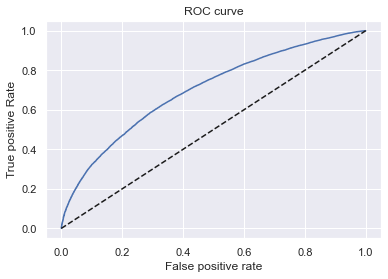

In [203]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle='--',color='k') # benchmark for comparision (predicting by chance)
plt.xlabel('False positive rate')
plt.ylabel('True positive Rate')
plt.title('ROC curve')

In [204]:
# since the blue line which we plotted is the curve for our model. since it is above the 45 degree line for any threshold
# the true positive reate is better than the one predicted by chance 


# by how much better

# the area under the ROC is called Area under the curve (AUC),, it is the good overall measure of how good the classification
# model is
# the auc for predicting by chance is 50% 

In [205]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6999831106930212

In [206]:
thresholds

array([1.99213344, 0.99213344, 0.98984025, ..., 0.43196747, 0.41001209,
       0.3961932 ])

In [207]:
thresholds.shape

(18136,)

In [208]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds),pd.DataFrame(tpr),pd.DataFrame(fpr)],axis=1)
df_cutoffs.columns = ['thresholds','tpr','fpr']
df_cutoffs.head()

,thresholds,tpr,fpr
0,1.992133,0.000000,0.000000
1,0.992133,0.000012,0.000000
2,0.989840,0.000349,0.000000
3,0.989815,0.000349,0.000098
4,0.988925,0.000770,0.000098


In [209]:
# the thresholds are in the descending order,, the first threshold is where nothing is being predicted to the max prob
# score from the suppied data+1 ,, this row is not very instructive and wont be useful for setting cutoffs so can either
# drop it altogether or set to the prob which is very close to 1 ... lets do the later

In [210]:
df_cutoffs['thresholds'][0]= 1-1/np.power(10,16)

In [211]:
1-1/np.power(10,16)

0.9999999999999999

In [212]:
# one common way to set the cutoff is based on the estimated prob to be good and one is through credit score
# as there is a one-to-one correspondence between the two

# since socre are much more interpretable let's opt for them

In [213]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds']/(1-df_cutoffs['thresholds']))-min_sum_coeff)*((max_score-min_score)/(max_sum_coeff-min_sum_coeff))+min_score).round()

In [214]:
df_cutoffs.head()

,thresholds,tpr,fpr,Score
0,1.000000,0.000000,0.000000,3356.0
1,0.992133,0.000012,0.000000,786.0
2,0.989840,0.000349,0.000000,765.0
3,0.989815,0.000349,0.000098,765.0
4,0.988925,0.000770,0.000098,758.0


In [215]:
# for first row,, it is out of range,, lets set them to maxumum possible score

In [216]:
df_cutoffs['Score'][0]= max_score

In [217]:
df_cutoffs.head()

,thresholds,tpr,fpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992133,0.000012,0.000000,786.0
2,0.989840,0.000349,0.000000,765.0
3,0.989815,0.000349,0.000098,765.0
4,0.988925,0.000770,0.000098,758.0


In [218]:
df_cutoffs.tail()

,thresholds,tpr,fpr,Score
18131,0.499492,0.999940,0.999706,396.0
18132,0.497967,0.999940,0.999804,396.0
18133,0.431967,0.999988,0.999804,374.0
18134,0.410012,0.999988,1.000000,367.0
18135,0.396193,1.000000,1.000000,362.0


In [219]:
# lets see the approval and rejection range for each possible cutoffs

# number of approved + number of rejected = total
# approval rate = number of approved / total
# rejection rate = number of rejected / total
# rejection rate = 1 - approval rate

In [220]:
# lets create a funciton that calculaes the number of approved borrowers for given threshold
# p - is the prob threshold for that fucntion
# this funciton will retuen the number of sborrowers for which the predicted prob. is >=p

In [221]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.396193
1    0.410012
2    0.427252
3    0.431967
4    0.479136
Name: y_hat_test_proba, dtype: float64

In [222]:
def n_approval(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba']>=p,1,0).sum()
    
    

In [223]:
df_cutoffs['N Approved']= df_cutoffs['thresholds'].apply(n_approval)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0]-df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved']/df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1-df_cutoffs['Approval Rate']

In [224]:
df_cutoffs.head()

,thresholds,tpr,fpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992133,0.000012,0.000000,786.0,1,93256,0.000011,0.999989
2,0.989840,0.000349,0.000000,765.0,29,93228,0.000311,0.999689
3,0.989815,0.000349,0.000098,765.0,30,93227,0.000322,0.999678
4,0.988925,0.000770,0.000098,758.0,65,93192,0.000697,0.999303


In [225]:
df_cutoffs.tail()

,thresholds,tpr,fpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
18131,0.499492,0.999940,0.999706,396.0,93249,8,0.999914,0.000086
18132,0.497967,0.999940,0.999804,396.0,93250,7,0.999925,0.000075
18133,0.431967,0.999988,0.999804,374.0,93254,3,0.999968,0.000032
18134,0.410012,0.999988,1.000000,367.0,93256,1,0.999989,0.000011
18135,0.396193,1.000000,1.000000,362.0,93257,0,1.000000,0.000000


In [226]:
# lets assume that highest level of prob we accept is 10%

In [227]:
df_cutoffs.iloc[5000:6200,]

,thresholds,tpr,fpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.908791,0.513886,0.233955,581.0,45071,48186,0.483299,0.516701
5001,0.908788,0.513886,0.234053,581.0,45072,48185,0.483310,0.516690
5002,0.908758,0.514091,0.234053,581.0,45089,48168,0.483492,0.516508
5003,0.908758,0.514091,0.234151,581.0,45090,48167,0.483503,0.516497
5004,0.908716,0.514260,0.234151,581.0,45104,48153,0.483653,0.516347
5005,0.908713,0.514284,0.234151,581.0,45106,48151,0.483674,0.516326
5006,0.908696,0.514356,0.234151,581.0,45112,48145,0.483738,0.516262
5007,0.908695,0.514356,0.234249,581.0,45113,48144,0.483749,0.516251
5008,0.908685,0.514416,0.234249,581.0,45118,48139,0.483803,0.516197
5009,0.908685,0.514416,0.234347,581.0,45119,48138,0.483814,0.516186


In [228]:
# from index 5899,, with this cutoff we will endup with 0.535863 --> aorund 53.58 % approval rate and around 46.3568%
# rejection rate

In [229]:
# how about the prob of defualt of 5% ---> 0.05

In [230]:
df_cutoffs.iloc[1000:3000,]

,thresholds,tpr,fpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.956700,0.180541,0.040039,646.0,15405,77852,0.165189,0.834811
1001,0.956699,0.180541,0.040137,646.0,15406,77851,0.165199,0.834801
1002,0.956663,0.180854,0.040137,646.0,15432,77825,0.165478,0.834522
1003,0.956662,0.180854,0.040236,646.0,15433,77824,0.165489,0.834511
1004,0.956598,0.181348,0.040236,645.0,15474,77783,0.165929,0.834071
1005,0.956596,0.181348,0.040334,645.0,15475,77782,0.165939,0.834061
1006,0.956580,0.181468,0.040334,645.0,15485,77772,0.166047,0.833953
1007,0.956580,0.181468,0.040432,645.0,15486,77771,0.166057,0.833943
1008,0.956545,0.181685,0.040432,645.0,15504,77753,0.166250,0.833750
1009,0.956542,0.181685,0.040530,645.0,15505,77752,0.166261,0.833739


In [231]:
# from index 1369, we see that the acceptance reate is 0.207909*100 --  20.79% and rejection rate is 0.792091*100= 79.20
# this is how we set cut off using estimated prob of being good 

In [232]:
inputs_train_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Source Verified,verification_status:Not Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_date:<38,mths_since_issue_date:38-39,mths_since_issue_date:40-41,mths_since_issue_date:42-48,mths_since_issue_date:49-52,mths_since_issue_date:53-64,mths_since_issue_date:65-84,mths_since_issue_date:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.821,int_rate:>20.821,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:142-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86
427211,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [233]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [234]:
df_scorecard.to_csv('df')

In [235]:
## exporting the PD model

In [236]:
import pickle

In [237]:
pickle.dump(reg,open('pd_model.sav','wb'))